# Noise theoretical

In [26]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.9, 12)

np.set_printoptions(suppress=True, precision=5)

sns.set(font_scale=3.5)

from network import Protocol, NetworkManager, BCPNNPerfect, TimedInput
from connectivity_functions import create_orthogonal_canonical_representation, build_network_representation
from connectivity_functions import get_weights_from_probabilities, get_probabilities_from_network_representation
from connectivity_functions import create_matrix_from_sequences_representation, produce_overlaped_sequences
from analysis_functions import calculate_recall_time_quantities, get_weights
from analysis_functions import get_weights_collections
from plotting_functions import plot_network_activity_angle, plot_weight_matrix
from analysis_functions import calculate_angle_from_history, calculate_winning_pattern_from_distances
from analysis_functions import calculate_patterns_timings, calculate_recall_success_nr, calculate_T_persistence

epsilon = 10e-80

In [ ]:
def mean_at_t(t, w_self, w_next, g_a, tau_m, tau_a, s0, perfect=False, steady_state=False):
    r = tau_m / tau_a
    A  = 1.0 / (1 - r)
    if perfect:
        mean_diff = w_self - g_a * (1 - np.exp(-t / tau_a))
    else:
        mean_diff = w_self - g_a * (1 - np.exp(-t / tau_a) * A)
        if steady_state:
            mean_diff += 0.0
        else:
            mean_diff += (s0 - w_self - g_a * r * A) * np.exp(-t / tau_m)
        
    return mean_diff

## The noise curve at every point in time

In [76]:
from scipy.special import erf
dt = 0.0001
Ttotal = 0.200
time = np.arange(0, Ttotal, dt)
n_t  = time.size
tau_a = 0.150
tau_m = 0.010
w_self = 1.0
w_next = 0.5
w_rest = 0.0
w_diff = w_self - w_next
w_rob = w_self - w_rest
g_w = 1.0
g_a = 1.0
r = tau_m / tau_a
sigma = 0.2

In [77]:
t = time[200]
A  = 1.0 / (1 - r)
mean_diff = delta_w - g_a * (1 - np.exp(-t / tau_m) * A)
standard = np.sqrt(tau_m) * sigma
argument = mean_diff / standard
success_at_t  = 0.5 * (1 - 0.5 * erf(argument))
print(success_at_t)

0.25


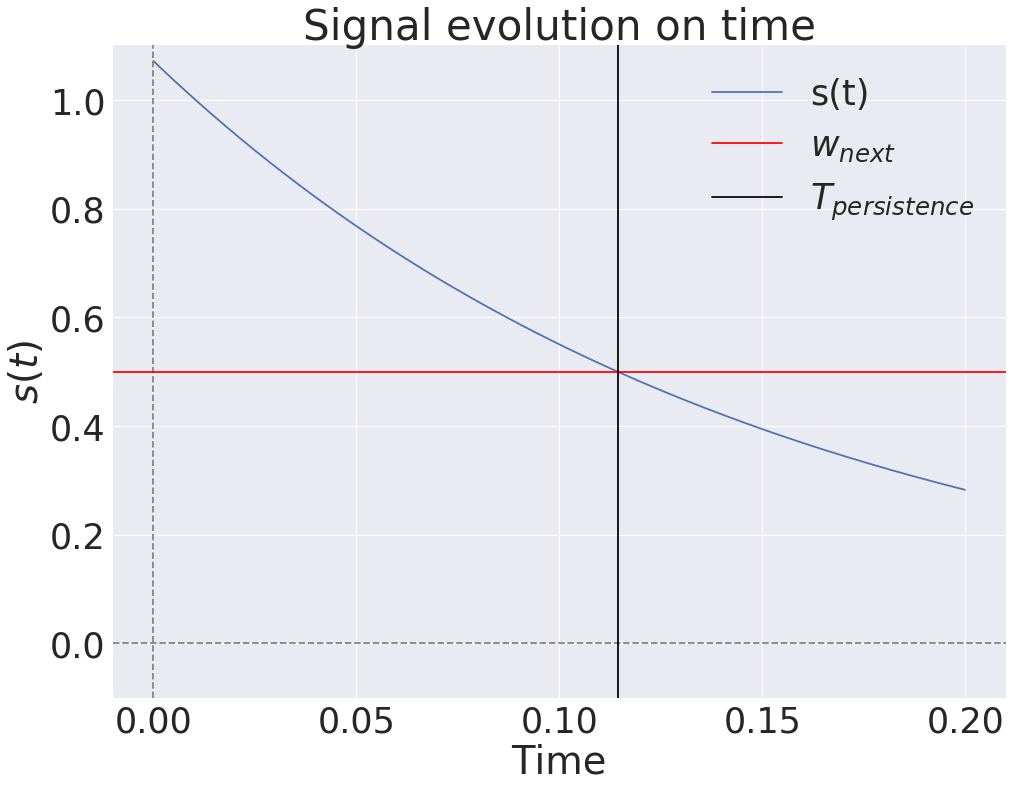

In [221]:
perfect = False
steady_state = True
T_per = calculate_T_persistence(tau_a, g_w, w_diff, g_a, tau_m, perfect=perfect)

mu = mean_at_t(time, w_self, w_next, g_a, tau_m, tau_a, s0=w_next, perfect=perfect, steady_state=steady_state)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

ax.plot(time, mu, label='s(t)')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.axhline(w_next, ls='-', color='red', label=r'$w_{next}$')
ax.axvline(T_per, ls='-', color='black', label=r'$T_{persistence}$')
ax.set_xlabel('Time')
ax.set_ylabel(r'$s(t)$')
ax.set_title('Signal evolution on time')


ax.set_ylim([-0.1, 1.1])
ax.legend();

In [131]:
t = time[200]
mu = mean_at_t(t, w_self, w_next, g_a, tau_m, tau_a, s0=w_next, perfect=perfect, steady_state=steady_state)
standard = np.sqrt(tau_m) * sigma
argument = (w_rest - mu) / standard
p_s = 0.5 * (1 + erf(argument))

In [144]:
w = np.linspace(w_rest, 1.0, num=100)
argument = (w - mu) / standard
p_s = 0.5 * (1 + erf(argument))

In [157]:
sigma = 0.5
w_rest = 0.0
mu = mean_at_t(time, w_self, w_next, g_a, tau_m, tau_a, s0=w_next, perfect=perfect, steady_state=steady_state)
standard = np.sqrt(tau_m) * sigma
argument = (w_rest - mu) / standard
p_s = 0.5 * (1 + erf(argument))

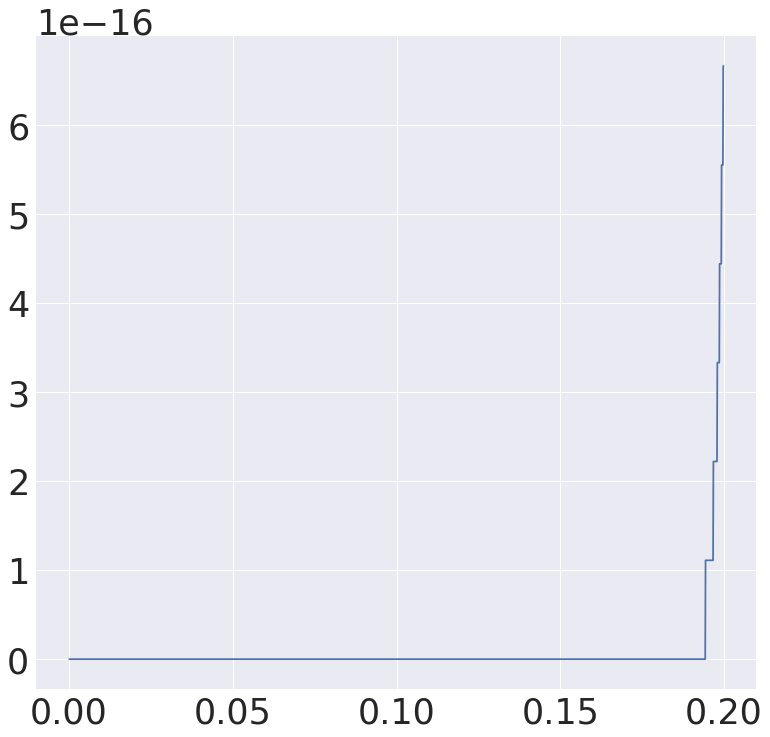

In [158]:
plt.plot(time, p_s)

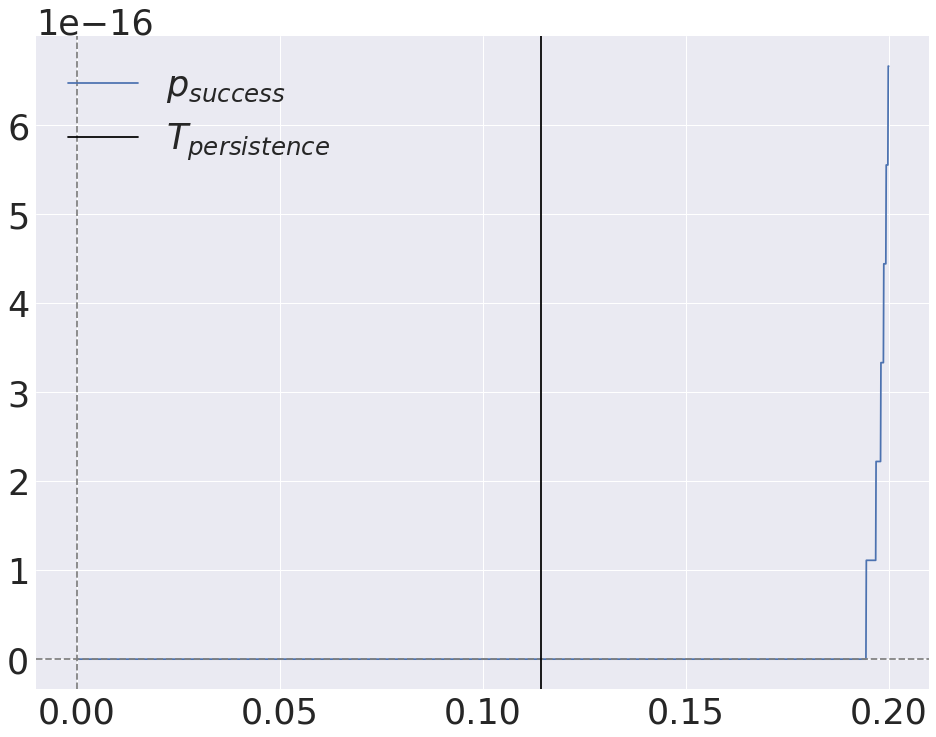

In [159]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

ax.plot(time, p_s, label=r'$p_{success}$')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.axvline(T_per, ls='-', color='black', label=r'$T_{persistence}$')
ax.set_ylim([-])
ax.legend()

##### Play with the error function

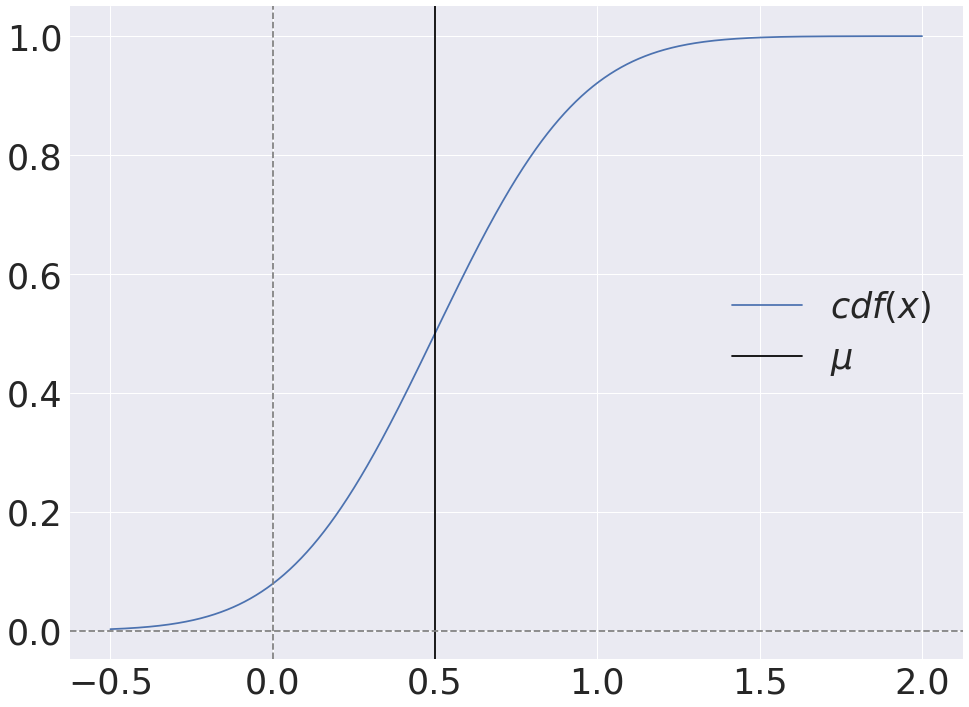

In [195]:
x = np.linspace(-0.5, 2.0, num=1000)
mu = 0.5
sigma = 5.0
standard = np.sqrt(tau_m) * sigma
argument = (x - mu) / standard
y = 0.5 * (1 + erf(argument))


fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

ax.plot(x, y, label=r'$cdf(x)$')
ax.axvline(mu, ls='-', color='black', label=r'$\mu$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

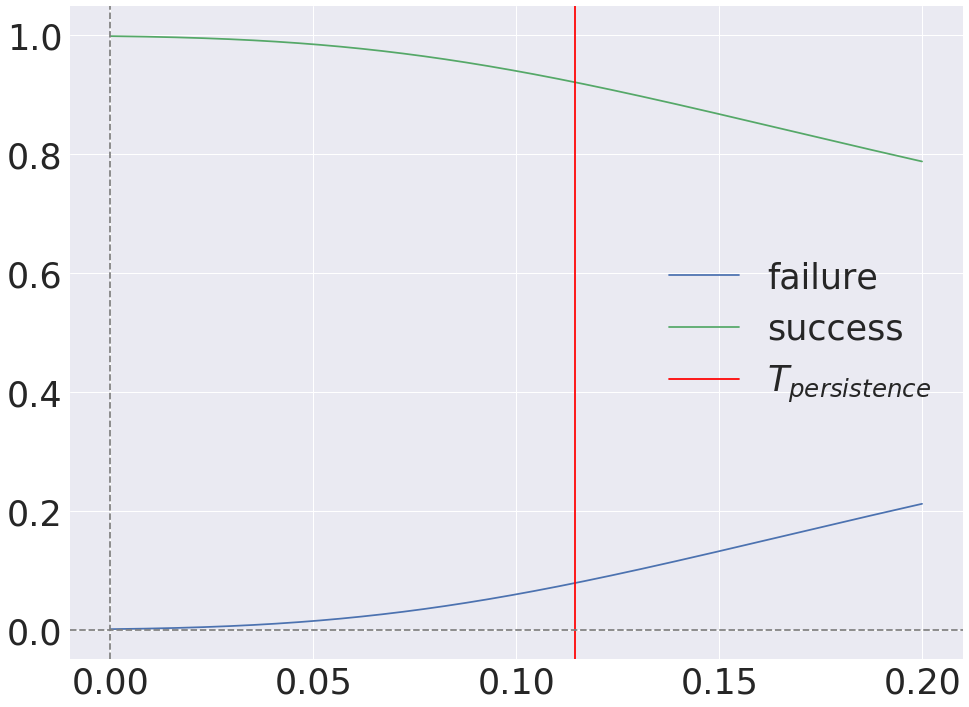

In [215]:
x = 0.
sigma = 5.0
perfect = False
steady_state = True
T_per = calculate_T_persistence(tau_a, g_w, w_diff, g_a, tau_m, perfect=perfect)
mu = mean_at_t(time, w_self, w_next, g_a, tau_m, tau_a, s0=w_next, perfect=perfect, steady_state=steady_state)
standard = np.sqrt(tau_m) * sigma
argument = (x - mu) / standard
failure = 0.5 * (1 + erf(argument))
success = 1 - failure

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(time, failure, label='failure')
ax.plot(time, success, label='success')

ax.axvline(T_per, color='red', label=r'$T_{persistence}$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

In [ ]:
x = time[time < T_per]
y = success[time < T_per]
p_success = sp.integrate.simps(y=y, x=x)

------
0.1 0.1143
------
1.0 0.1143
------
5.0 0.111280649146
------
10.0 0.0970561415984


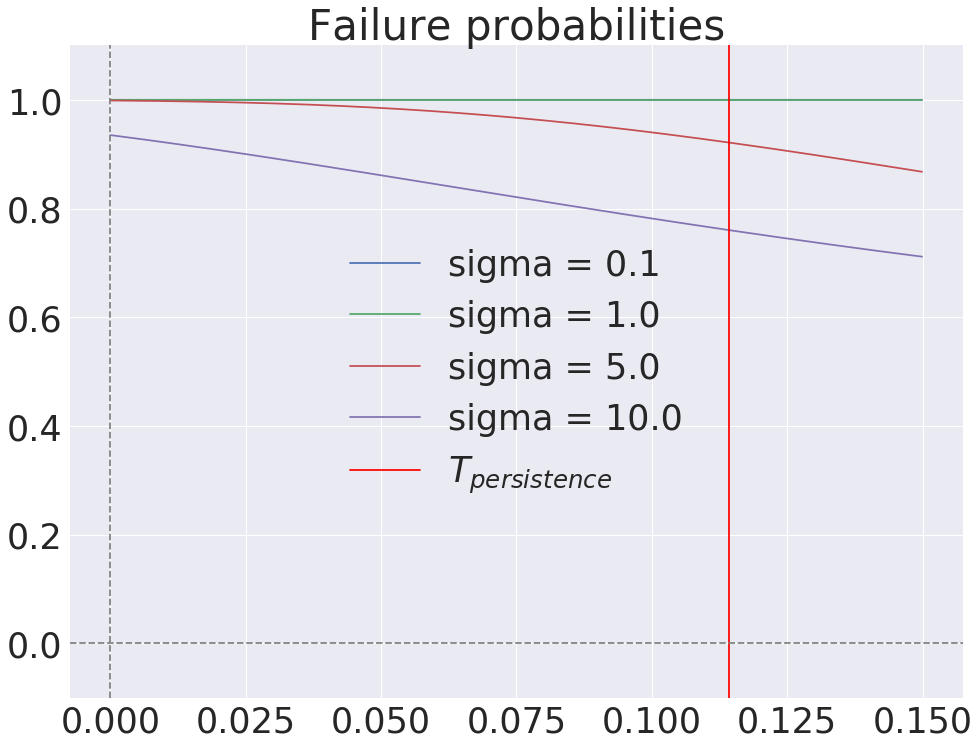

In [250]:
dt = 0.0001
Ttotal = 0.150
time = np.arange(0, Ttotal, dt)
n_t  = time.size
tau_a = 0.150
tau_m = 0.010
w_self = 1.0
w_next = 0.5
w_rest = 0.0
w_diff = w_self - w_next
w_rob = w_self - w_rest
g_w = 1.0
g_a = 1.0
sigma = 0.2
perfect = False
steady_state = True


x = 0.0
sigmas = [0.1, 1.0, 5.0, 10.0]
perfect = False
steady_state = True
T_per = calculate_T_persistence(tau_a, g_w, w_diff, g_a, tau_m, perfect=perfect)
mu = mean_at_t(time, w_self, w_next, g_a, tau_m, tau_a, s0=w_next, perfect=perfect, steady_state=steady_state)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for sigma in sigmas:

    standard = np.sqrt(tau_m) * sigma
    argument = (w_rest - mu) / standard
    failure = 0.5 * (1 + erf(argument))
    success = 1 - failure


    ax.plot(time, success, label='sigma = ' + str(sigma))
    
    x = time[time < T_per]
    y = success[time < T_per]
    p_success = sp.integrate.simps(y=y, x=x)
    print('------')
    print(sigma, p_success)

ax.set_title('Failure probabilities')
ax.axvline(T_per, color='red', label=r'$T_{persistence}$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.set_ylim([-0.1, 1.1])
ax.legend();

In [237]:
def get_success_probability_1(time, w_self, w_next, w_rest, g_a, tau_m, 
                            tau_a, sigma, s0, perfect=False, steady_state=False):
    
    T_per = calculate_T_persistence(tau_a, g_w, w_diff, g_a, tau_m, perfect=perfect)
    if T_per >= time[-1]:
        raise ValueError("Not enough time to integrate, increase time")

    mu = mean_at_t(time, w_self, w_next, g_a, tau_m, tau_a, s0=w_next, perfect=perfect, steady_state=steady_state)
    
    standard = np.sqrt(tau_m) * sigma
    argument = (w_rest - mu) / standard
    failure = 0.5 * (1 + erf(argument))
    success = 1 - failure
    
    x = time[time < T_per]
    y = success[time < T_per]
    p_success = sp.integrate.simps(y=y, x=x)
    
    return p_success

In [239]:
dt = 0.0001
Ttotal = 0.150
time = np.arange(0, Ttotal, dt)
n_t  = time.size
tau_a = 0.150
tau_m = 0.010
w_self = 1.0
w_next = 0.5
w_rest = 0.0
w_diff = w_self - w_next
w_rob = w_self - w_rest
g_w = 1.0
g_a = 1.0
sigma = 0.2
perfect = False
steady_state = True

p = get_success_probability_1(time, w_self, w_next, w_rest, g_a, tau_m, 
                            tau_a, sigma, s0=w_next, perfect=False, steady_state=False)

In [248]:
num = 50
sigma_vector = np.linspace(0.1, 10, num=num)
p_sigma = np.zeros(num)

for i in range(num):
    sigma = sigma_vector[i]
    p = get_success_probability_1(time, w_self, w_next, w_rest, g_a, tau_m, 
                            tau_a, sigma, s0=w_next, perfect=False, steady_state=False)
    p_sigma[i] = p

/home/heberto/miniconda/envs/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


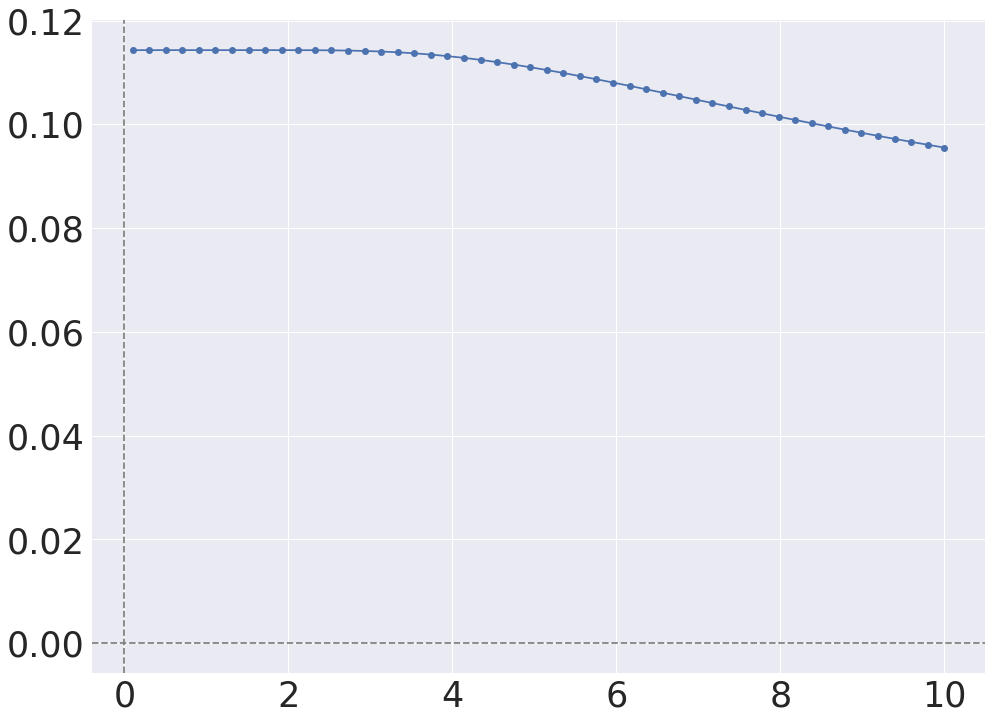

In [249]:

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(sigma_vector, p_sigma, 'o-')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

It seems that the effect from the moving distribution is not enough.

## Take into account the w_rest distribution

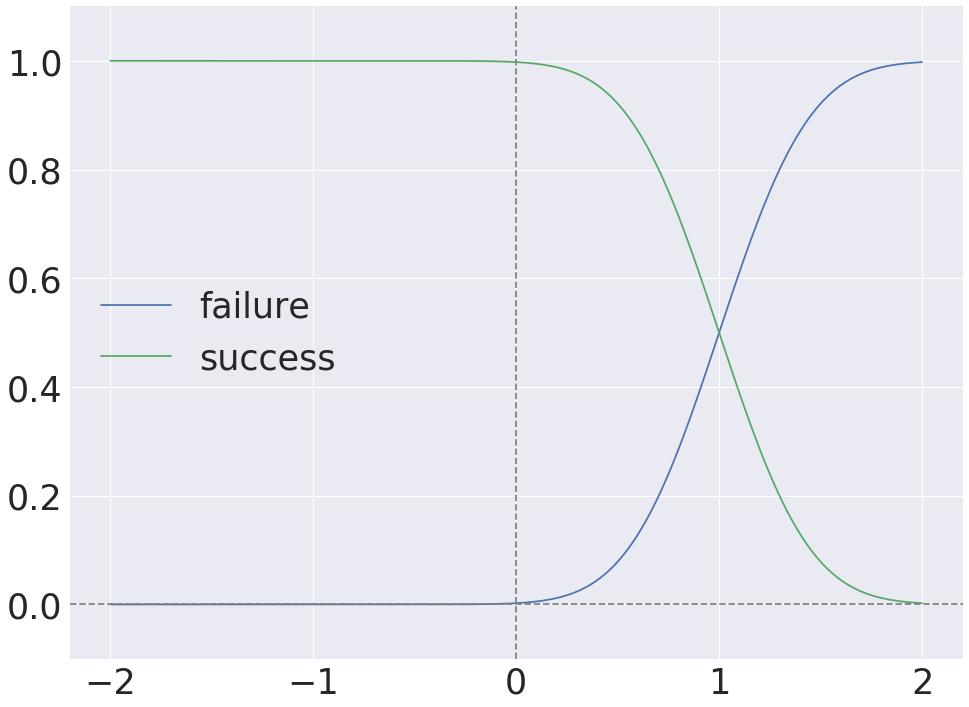

In [264]:
sigma = 3.0
x = np.linspace(-2, 2, num=200)
mean = w_self - w_rest
nominator = x - mean
denominator = np.sqrt(tau_m) * sigma * np.sqrt(2)

argument = nominator/ denominator
failure = 0.5 * (1 + erf(argument))
success = 1 - failure

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(x, failure, label='failure')
ax.plot(x, success, label='success')

standard = np.sqrt(tau_m) * sigma
argument = (x - w_self) / standard
y = 0.5 * (1 + erf(argument))


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.set_ylim([-0.1, 1.1])
ax.legend();

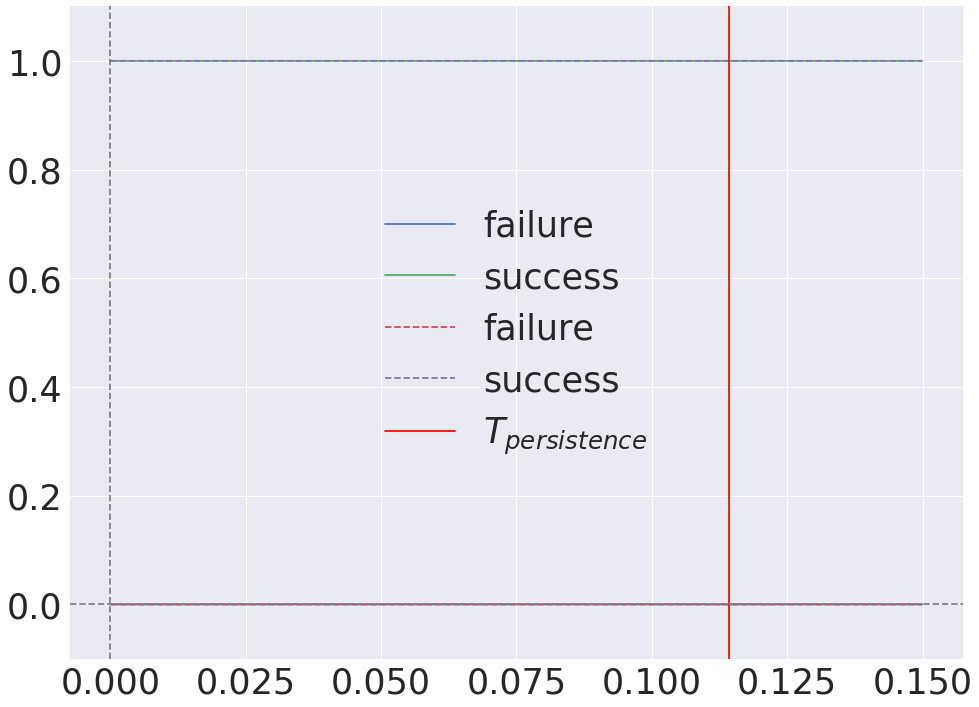

In [266]:
dt = 0.0001
Ttotal = 0.150
time = np.arange(0, Ttotal, dt)
n_t  = time.size
tau_a = 0.150
tau_m = 0.010
w_self = 1.0
w_next = 0.5
w_rest = 0.0
w_diff = w_self - w_next
w_rob = w_self - w_rest
g_w = 1.0
g_a = 1.0
sigma = 1.0
perfect = False
steady_state = True
mu = mean_at_t(time, w_self, w_next, g_a, tau_m, tau_a, s0=w_next, perfect=perfect, steady_state=steady_state)

mean = mu - w_rest
nominator = 0 - mean
denominator = np.sqrt(tau_m) * sigma * np.sqrt(2)

argument = nominator/ denominator
failure = 0.5 * (1 + erf(argument))
success = 1 - failure

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(time, failure, label='failure')
ax.plot(time, success, label='success')

standard = np.sqrt(tau_m) * sigma
argument = (w_rest - mu) / standard
failure = 0.5 * (1 + erf(argument))
success = 1 - failure

ax.plot(time, failure, ls='--', label='failure')
ax.plot(time, success, ls='--', label='success')

ax.axvline(T_per, color='red', label=r'$T_{persistence}$')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.set_ylim([-0.1, 1.1])
ax.legend();

In [275]:
def get_success_probability_2(time, w_self, w_next, w_rest, g_a, tau_m, 
                            tau_a, sigma, s0, perfect=False, steady_state=False):
    
    T_per = calculate_T_persistence(tau_a, g_w, w_diff, g_a, tau_m, perfect=perfect)
    if T_per >= time[-1]:
        raise ValueError("Not enough time to integrate, increase time")

    mu = mean_at_t(time, w_self, w_next, g_a, tau_m, tau_a, s0=w_next, perfect=perfect, steady_state=steady_state)
    
    mean = mu - w_rest
    nominator = 0 - mean
    denominator = np.sqrt(tau_m) * sigma * np.sqrt(2)

    argument = nominator/ denominator
    failure = 0.5 * (1 + erf(argument))
    success = 1 - failure
    
    x = time[time < T_per]
    y = success[time < T_per]
    p_success = sp.integrate.simps(y=y, x=x)
    
    return p_success

In [276]:
num = 200
sigma_vector = np.linspace(0.1, 20.0, num=num)
p_sigma = np.zeros(num)

for i in range(num):
    sigma = sigma_vector[i]
    p = get_success_probability_2(time, w_self, w_next, w_rest, g_a, tau_m, 
                            tau_a, sigma, s0=w_next, perfect=False, steady_state=False)
    p_sigma[i] = p

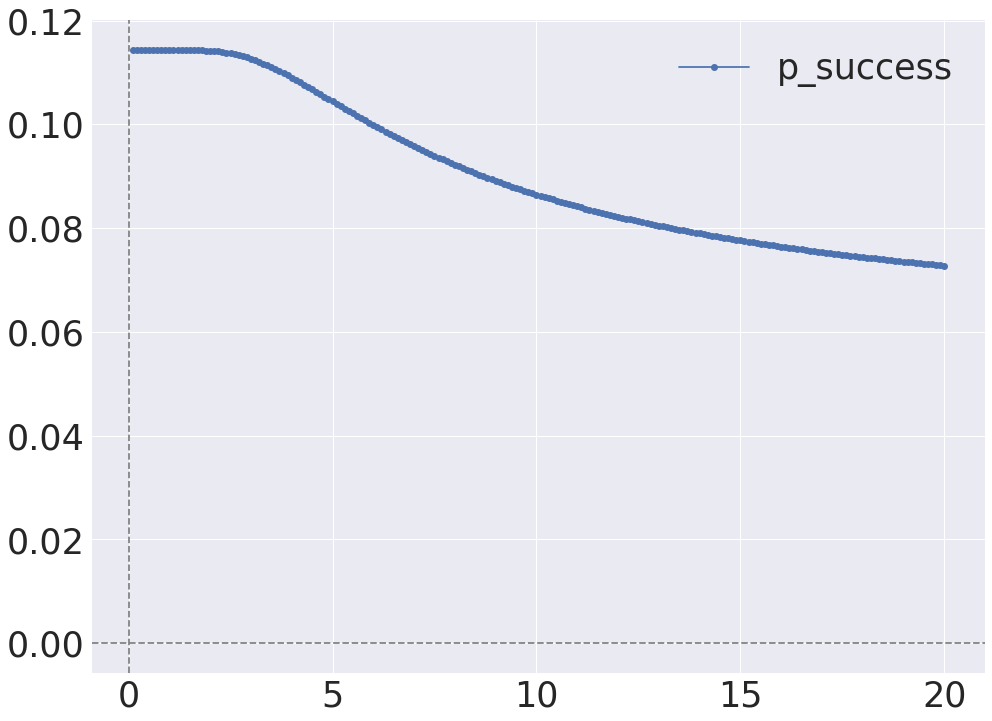

In [277]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(sigma_vector, p_sigma, 'o-', label='p_success')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

## Take into account the intermediate current

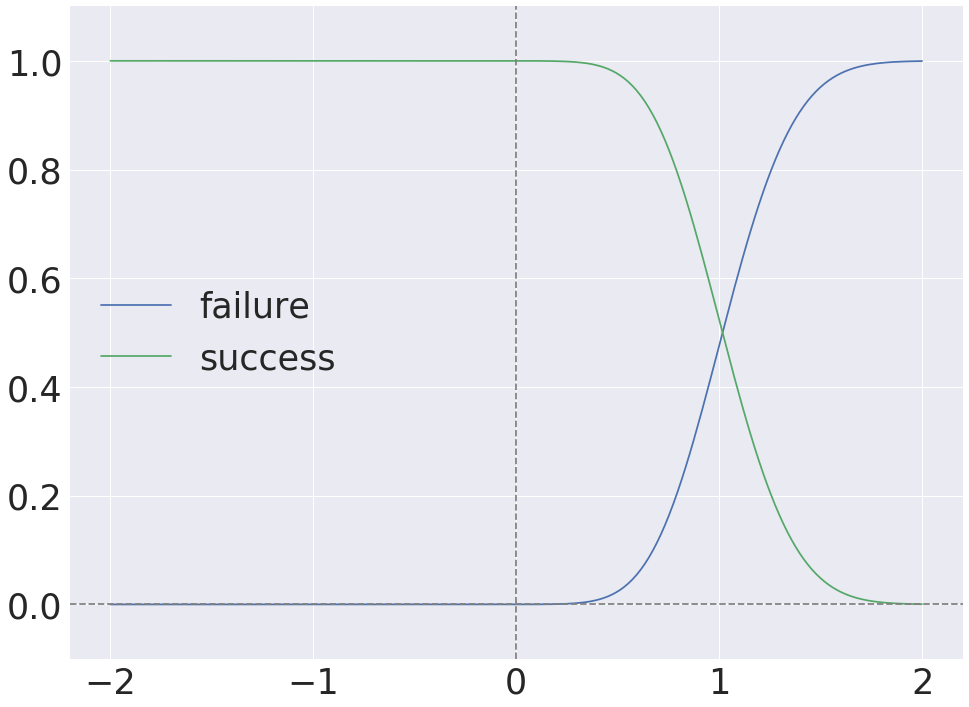

In [284]:
sigma = 3.0
x = np.linspace(-2, 2, num=200)

mean = w_self - w_rest
nominator = x - mean
denominator = np.sqrt(tau_m) * sigma * np.sqrt(2)

argument = nominator/ denominator
failure1 = 0.5 * (1 + erf(argument))

mean = w_self - w_next
nominator = x - mean
denominator = np.sqrt(tau_m) * sigma * np.sqrt(2)
argument = nominator/ denominator
failure2 = 0.5 * (1 + erf(argument))

failure = failure1 * failure2
success = 1 - failure

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(x, failure, label='failure')
ax.plot(x, success, label='success')


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.set_ylim([-0.1, 1.1])
ax.legend();

In [290]:
def get_success_probability_3(time, w_self, w_next, w_rest, g_a, tau_m, 
                            tau_a, sigma, s0, perfect=False, steady_state=False):
    
    T_per = calculate_T_persistence(tau_a, g_w, w_diff, g_a, tau_m, perfect=perfect)
    if T_per >= time[-1]:
        raise ValueError("Not enough time to integrate, increase time")

    s = mean_at_t(time, w_self, w_next, g_a, tau_m, tau_a, s0=w_next, perfect=perfect, steady_state=steady_state)
    
    mean = s - w_rest
    nominator = 0 - mean
    denominator = np.sqrt(tau_m) * sigma * np.sqrt(2)

    argument = nominator/ denominator
    failure1 = 0.5 * (1 + erf(argument))
        
    mean = s - w_next
    nominator = 0 - mean
    denominator = np.sqrt(tau_m) * sigma * np.sqrt(2)
    argument = nominator/ denominator
    failure2 = 0.5 * (1 + erf(argument))
    
    failure = failure1 * failure2
    success = 1 - failure
    
    x = time[time < T_per]
    y = success[time < T_per]
    p_success = sp.integrate.simps(y=y, x=x)
    
    return p_success

In [291]:
num = 200
sigma_vector = np.linspace(0.1, 20.0, num=num)
p_sigma = np.zeros(num)

for i in range(num):
    sigma = sigma_vector[i]
    p = get_success_probability_3(time, w_self, w_next, w_rest, g_a, tau_m, 
                            tau_a, sigma, s0=w_next, perfect=False, steady_state=False)
    p_sigma[i] = p

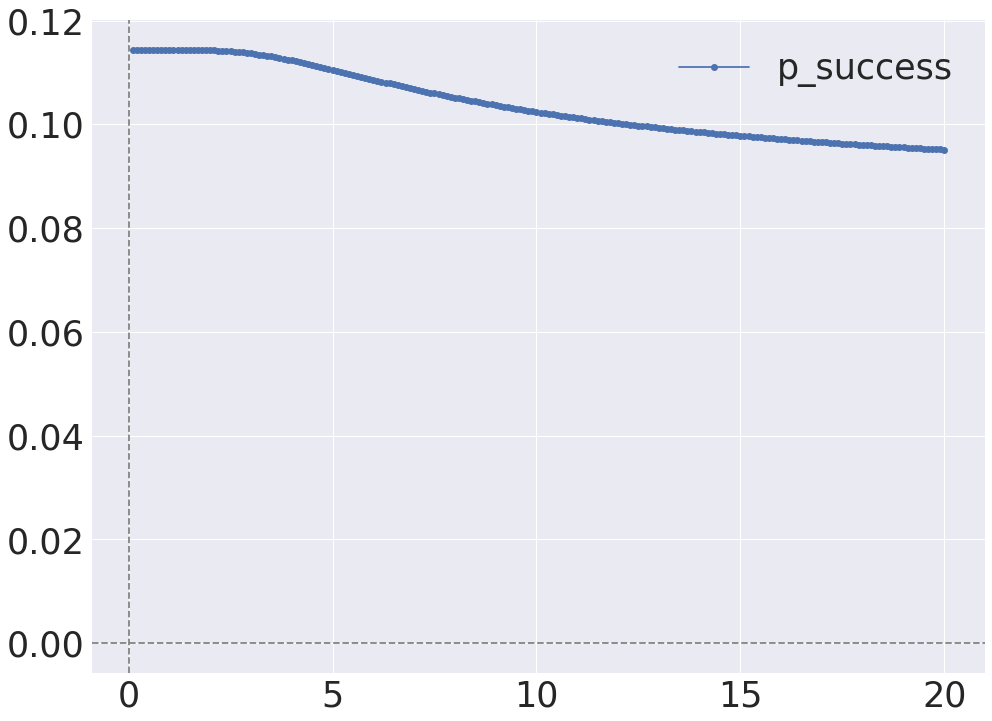

In [292]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(sigma_vector, p_sigma, 'o-', label='p_success')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();